# Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Collection from SEC's EDGAR database
# Manual extraction for each company, 10-K filings for the last three fiscal years
# Extracting the following financial figures: Total Revenue, Net Income, Total Assets, Total Liabilities, and Cash Flow from Operating Activities

In [2]:
df = pd.read_csv('Financial Data.csv')

In [3]:
df.head()

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities
0,Microsoft,2021,168088,61271,333779,191791,76740
1,Microsoft,2022,198270,72738,364840,198298,89035
2,Microsoft,2023,211915,72361,411976,205753,87582
3,Tesla,2021,53821,5519,62131,30548,11497
4,Tesla,2022,81462,12556,82338,36440,14724


In [4]:
df.dtypes

Company                                object
Year                                    int64
Total Revenue                           int64
Net Income                              int64
Total Assets                            int64
Total Liabilities                       int64
Cash Flow from Operating Activities     int64
dtype: object

# Analyzing trends year-over-year % change

In [5]:
df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income'].pct_change() * 100
df['Assets Growth (%)'] = df.groupby(['Company'])['Total Assets'].pct_change() * 100
df['Liabilities Growth (%)'] = df.groupby(['Company'])['Total Liabilities'].pct_change() * 100
df['Cash Flow from Operating Activities Growth (%)'] = df.groupby(['Company'])['Cash Flow from Operating Activities'].pct_change() * 100


In [6]:
df

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow from Operating Activities Growth (%)
0,Microsoft,2021,168088,61271,333779,191791,76740,NaN,NaN,NaN,NaN,NaN
1,Microsoft,2022,198270,72738,364840,198298,89035,17.956071,18.715216,9.305858,3.392756,16.021631
2,Microsoft,2023,211915,72361,411976,205753,87582,6.882030,-0.518299,12.919636,3.759493,-1.631942
3,Tesla,2021,53821,5519,62131,30548,11497,NaN,NaN,NaN,NaN,NaN
4,Tesla,2022,81462,12556,82338,36440,14724,51.357277,127.504983,32.523217,19.287678,28.068192
5,Tesla,2023,96773,14974,106618,43009,13256,18.795267,19.257725,29.488207,18.026894,-9.970117
6,Apple,2021,365817,94680,351002,287912,104038,NaN,NaN,NaN,NaN,NaN
7,Apple,2022,394328,99803,352755,302083,122151,7.793788,5.410858,0.499427,4.921990,17.409985
8,Apple,2023,383285,96995,352583,290437,110543,-2.800461,-2.813543,-0.048759,-3.855232,-9.502992


In [7]:
df.fillna(0, inplace=True)

In [8]:
df

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow from Operating Activities Growth (%)
0,Microsoft,2021,168088,61271,333779,191791,76740,0.000000,0.000000,0.000000,0.000000,0.000000
1,Microsoft,2022,198270,72738,364840,198298,89035,17.956071,18.715216,9.305858,3.392756,16.021631
2,Microsoft,2023,211915,72361,411976,205753,87582,6.882030,-0.518299,12.919636,3.759493,-1.631942
3,Tesla,2021,53821,5519,62131,30548,11497,0.000000,0.000000,0.000000,0.000000,0.000000
4,Tesla,2022,81462,12556,82338,36440,14724,51.357277,127.504983,32.523217,19.287678,28.068192
5,Tesla,2023,96773,14974,106618,43009,13256,18.795267,19.257725,29.488207,18.026894,-9.970117
6,Apple,2021,365817,94680,351002,287912,104038,0.000000,0.000000,0.000000,0.000000,0.000000
7,Apple,2022,394328,99803,352755,302083,122151,7.793788,5.410858,0.499427,4.921990,17.409985
8,Apple,2023,383285,96995,352583,290437,110543,-2.800461,-2.813543,-0.048759,-3.855232,-9.502992


In [9]:
df.to_csv('final_financial_data_report.csv')

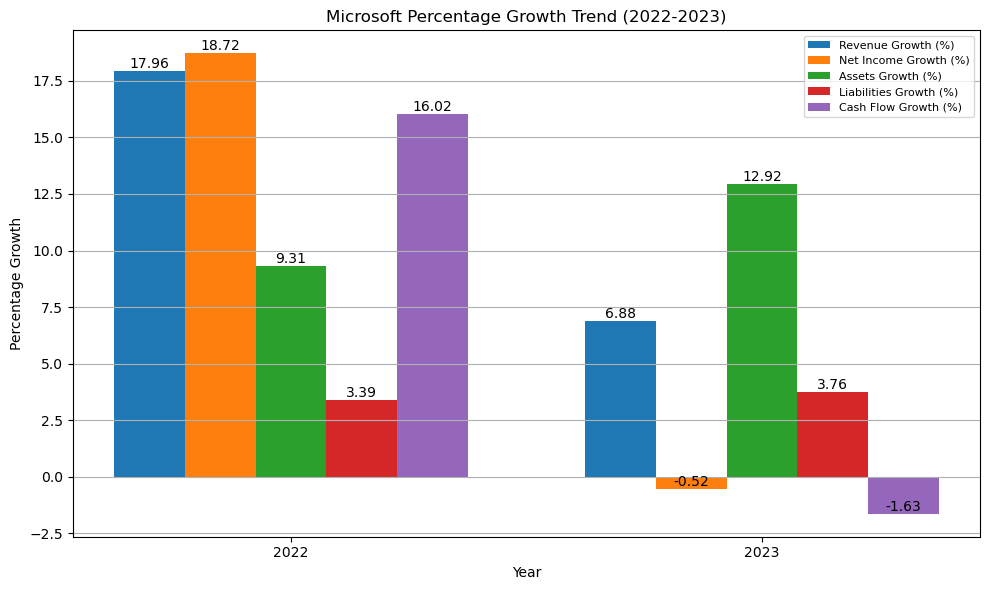

In [10]:
# Microsoft (2022, 2023)
microsoft_data = df[(df['Company'] == 'Microsoft') & (df['Year'].isin([2022, 2023]))]

# Convert the columns to numpy arrays
years = microsoft_data['Year'].to_numpy()
revenue_growth = microsoft_data['Revenue Growth (%)'].to_numpy()
net_income_growth = microsoft_data['Net Income Growth (%)'].to_numpy()
assets_growth = microsoft_data['Assets Growth (%)'].to_numpy()
liabilities_growth = microsoft_data['Liabilities Growth (%)'].to_numpy()
cash_flow_growth = microsoft_data['Cash Flow from Operating Activities Growth (%)'].to_numpy()

# Set the positions for each bar (grouping the bars by year)
bar_width = 0.15
x_positions = range(len(years))

# Create the figure with a larger width
plt.figure(figsize=(10, 6))

# Create the bar chart for each percentage growth
bars_revenue = plt.bar([pos - 2*bar_width for pos in x_positions], revenue_growth, width=bar_width, label='Revenue Growth (%)')
bars_net_income = plt.bar([pos - bar_width for pos in x_positions], net_income_growth, width=bar_width, label='Net Income Growth (%)')
bars_assets = plt.bar(x_positions, assets_growth, width=bar_width, label='Assets Growth (%)')
bars_liabilities = plt.bar([pos + bar_width for pos in x_positions], liabilities_growth, width=bar_width, label='Liabilities Growth (%)')
bars_cash_flow = plt.bar([pos + 2*bar_width for pos in x_positions], cash_flow_growth, width=bar_width, label='Cash Flow Growth (%)')

# Add data labels on top of each bar
for bars in [bars_revenue, bars_net_income, bars_assets, bars_liabilities, bars_cash_flow]:
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', 
                 ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage Growth')
plt.title('Microsoft Percentage Growth Trend (2022-2023)')

# Display years on the x-axis
plt.xticks(x_positions, years.astype(int))

# Show the legend with smaller font size
plt.legend(fontsize=8)

# Show grid only on the y-axis
plt.grid(True, axis='y')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


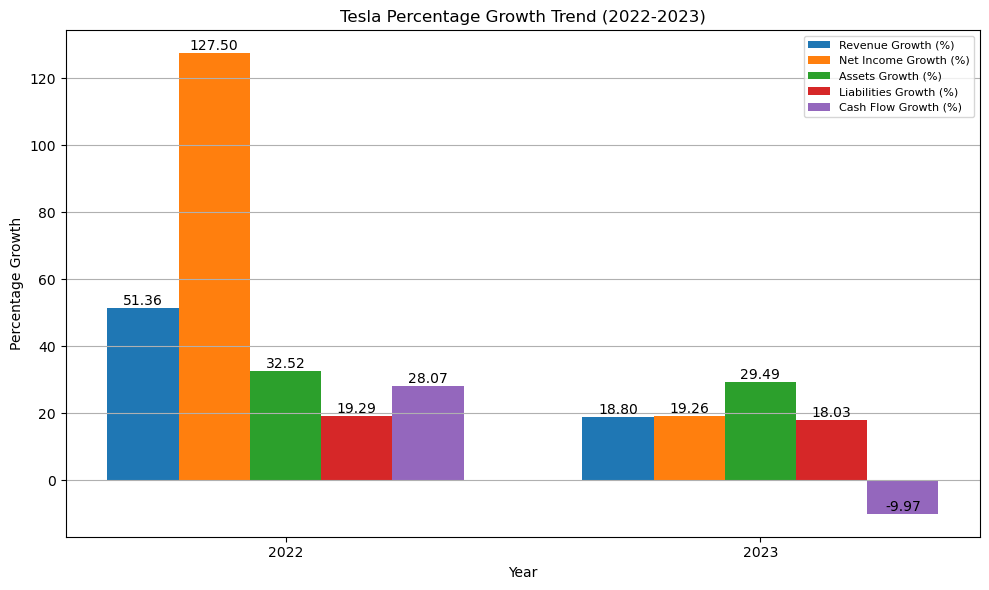

In [11]:
# Tesla (2022, 2023)
Tesla_data = df[(df['Company'] == 'Tesla') & (df['Year'].isin([2022, 2023]))]

# Convert the columns to numpy arrays
years = Tesla_data['Year'].to_numpy()
revenue_growth = Tesla_data['Revenue Growth (%)'].to_numpy()
net_income_growth = Tesla_data['Net Income Growth (%)'].to_numpy()
assets_growth = Tesla_data['Assets Growth (%)'].to_numpy()
liabilities_growth = Tesla_data['Liabilities Growth (%)'].to_numpy()
cash_flow_growth = Tesla_data['Cash Flow from Operating Activities Growth (%)'].to_numpy()

# Set the positions for each bar (grouping the bars by year)
bar_width = 0.15
x_positions = range(len(years))

# Create the figure with a larger width
plt.figure(figsize=(10, 6))

# Create the bar chart for each percentage growth
bars_revenue = plt.bar([pos - 2*bar_width for pos in x_positions], revenue_growth, width=bar_width, label='Revenue Growth (%)')
bars_net_income = plt.bar([pos - bar_width for pos in x_positions], net_income_growth, width=bar_width, label='Net Income Growth (%)')
bars_assets = plt.bar(x_positions, assets_growth, width=bar_width, label='Assets Growth (%)')
bars_liabilities = plt.bar([pos + bar_width for pos in x_positions], liabilities_growth, width=bar_width, label='Liabilities Growth (%)')
bars_cash_flow = plt.bar([pos + 2*bar_width for pos in x_positions], cash_flow_growth, width=bar_width, label='Cash Flow Growth (%)')

# Add data labels on top of each bar
for bars in [bars_revenue, bars_net_income, bars_assets, bars_liabilities, bars_cash_flow]:
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', 
                 ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage Growth')
plt.title('Tesla Percentage Growth Trend (2022-2023)')

# Display years on the x-axis
plt.xticks(x_positions, years.astype(int))

# Show the legend with smaller font size
plt.legend(fontsize=8)

# Show grid only on the y-axis
plt.grid(True, axis='y')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

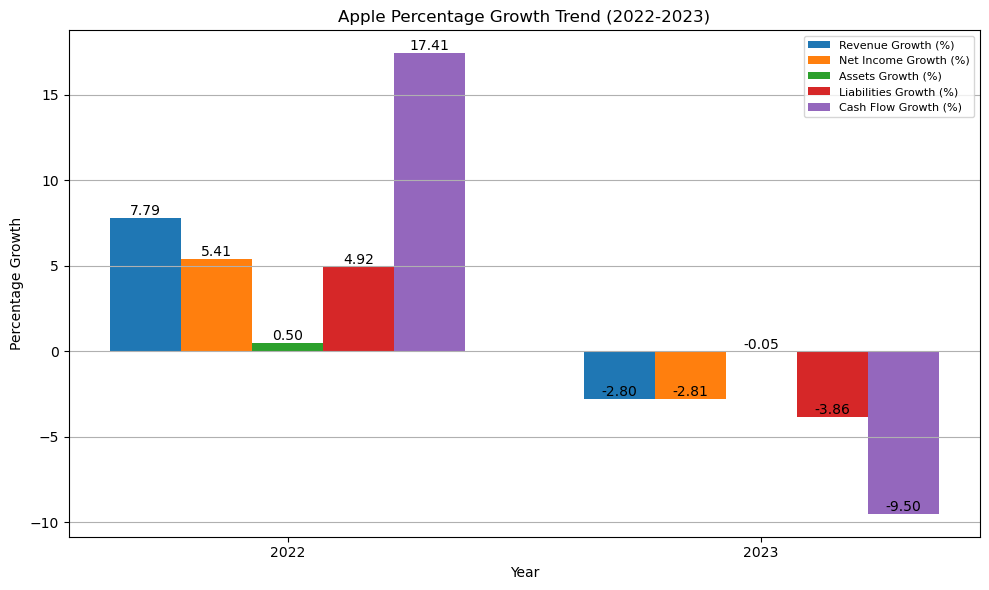

In [12]:
# Apple (2022, 2023)
apple_data = df[(df['Company'] == 'Apple') & (df['Year'].isin([2022, 2023]))]

# Convert the columns to numpy arrays
years = apple_data['Year'].to_numpy()
revenue_growth = apple_data['Revenue Growth (%)'].to_numpy()
net_income_growth = apple_data['Net Income Growth (%)'].to_numpy()
assets_growth = apple_data['Assets Growth (%)'].to_numpy()
liabilities_growth = apple_data['Liabilities Growth (%)'].to_numpy()
cash_flow_growth = apple_data['Cash Flow from Operating Activities Growth (%)'].to_numpy()

# Set the positions for each bar (grouping the bars by year)
bar_width = 0.15
x_positions = range(len(years))

# Create the figure with a larger width
plt.figure(figsize=(10, 6))

# Create the bar chart for each percentage growth
bars_revenue = plt.bar([pos - 2*bar_width for pos in x_positions], revenue_growth, width=bar_width, label='Revenue Growth (%)')
bars_net_income = plt.bar([pos - bar_width for pos in x_positions], net_income_growth, width=bar_width, label='Net Income Growth (%)')
bars_assets = plt.bar(x_positions, assets_growth, width=bar_width, label='Assets Growth (%)')
bars_liabilities = plt.bar([pos + bar_width for pos in x_positions], liabilities_growth, width=bar_width, label='Liabilities Growth (%)')
bars_cash_flow = plt.bar([pos + 2*bar_width for pos in x_positions], cash_flow_growth, width=bar_width, label='Cash Flow Growth (%)')

# Add data labels on top of each bar
for bars in [bars_revenue, bars_net_income, bars_assets, bars_liabilities, bars_cash_flow]:
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', 
                 ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage Growth')
plt.title('Apple Percentage Growth Trend (2022-2023)')

# Display years on the x-axis
plt.xticks(x_positions, years.astype(int))

# Show the legend with smaller font size
plt.legend(fontsize=8)

# Show grid only on the y-axis
plt.grid(True, axis='y')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# Summarizing findings

In [13]:
GrowthAveragesummary = df.groupby('Company').agg({
    'Revenue Growth (%)': 'mean',
    'Net Income Growth (%)': 'mean',
    'Assets Growth (%)' : 'mean',
    'Liabilities Growth (%)' : 'mean',
    'Cash Flow from Operating Activities Growth (%)' :'mean'    
}).reset_index()

In [14]:
print('Year-By-Year Average Growth Rates(%) :')
GrowthAveragesummary

Year-By-Year Average Growth Rates(%) :


,Company,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow from Operating Activities Growth (%)
0,Apple,1.664442,0.865772,0.150223,0.355586,2.635664
1,Microsoft,8.279367,6.065639,7.408498,2.384083,4.796563
2,Tesla,23.384181,48.920903,20.670475,12.438191,6.032692


In [15]:
GrowthAveragesummary.to_csv('final_financial_data_%summary.csv')

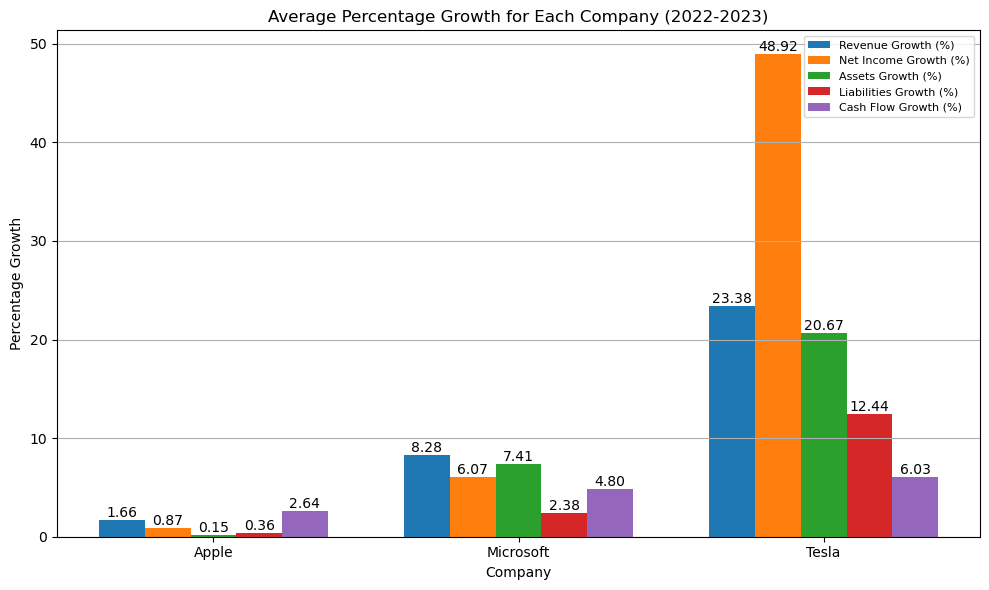

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#average growth of each company
data = {
    'Company': ['Apple', 'Microsoft', 'Tesla'],
    'Revenue Growth (%)': [1.664442, 8.279367, 23.384181],
    'Net Income Growth (%)': [0.865772, 6.065639, 48.920903],
    'Assets Growth (%)': [0.150223, 7.408498, 20.670475],
    'Liabilities Growth (%)': [0.355586, 2.384083, 12.438191],
    'Cash Flow from Operating Activities Growth (%)': [2.635664, 4.796563, 6.032692]
}

# Create DataFrame from the data
growth_data = pd.DataFrame(data)

# Set the positions for each bar (grouping the bars by company)
bar_width = 0.15
x_positions = np.arange(len(growth_data))

# Create the figure with a larger width
plt.figure(figsize=(10, 6))

# Create the bar chart for each percentage growth for each company
bars_revenue = plt.bar(x_positions - 2*bar_width, growth_data['Revenue Growth (%)'], width=bar_width, label='Revenue Growth (%)')
bars_net_income = plt.bar(x_positions - bar_width, growth_data['Net Income Growth (%)'], width=bar_width, label='Net Income Growth (%)')
bars_assets = plt.bar(x_positions, growth_data['Assets Growth (%)'], width=bar_width, label='Assets Growth (%)')
bars_liabilities = plt.bar(x_positions + bar_width, growth_data['Liabilities Growth (%)'], width=bar_width, label='Liabilities Growth (%)')
bars_cash_flow = plt.bar(x_positions + 2*bar_width, growth_data['Cash Flow from Operating Activities Growth (%)'], width=bar_width, label='Cash Flow Growth (%)')

# Add data labels on top of each bar
for bars in [bars_revenue, bars_net_income, bars_assets, bars_liabilities, bars_cash_flow]:
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', 
                 ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel('Company')
plt.ylabel('Percentage Growth')
plt.title('Average Percentage Growth for Each Company (2022-2023)')

# Display company names on the x-axis
plt.xticks(x_positions, growth_data['Company'])

# Show the legend with smaller font size
plt.legend(fontsize=8)

# Show grid only on the y-axis
plt.grid(True, axis='y')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


# Overall Analysis:
Tesla is the clear leader in terms of growth across almost all metrics, demonstrating explosive expansion in revenue, net income, and assets. However, it is also taking on higher liabilities, which reflects its high-risk, high-reward approach to growth.

Microsoft exhibits steady and solid growth, with controlled liabilities and substantial investments in assets. It is expanding at a healthy pace, but not as aggressively as Tesla. The company’s profitability is growing, although at a slower rate.

Apple, in contrast, shows slower growth across all metrics. While it remains highly profitable and stable, its minimal growth in assets, liabilities, and revenue suggests that it is in a more mature phase and not pursuing aggressive expansion like its competitors.